In [1]:
import os
from trainy_context import train
import toy
import numpy as np
import datetime
from model import VAE_Solver,RL_Solver
from toy import ContextProblem
import torch

/home/mvmacfarlane/miniconda3/envs/CVAE_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)


In [3]:
#Create config

config = Namespace(

    #Running Settings
    output_path = "",
    device = "cuda",
    model_path = None,

    #Training
    batch_size = 128, #512
    epoch_size = 512*8,  #102400
    generate_solutions_batch_size = 512*8,
    nb_epochs = 200 ,
    lr = 1e-3, #1e-4
    lr_imp = 1e-3,
    lr_diff = 1e-3,

    #Loss
    KLD_weight = 1e-3, #0.001

    #Problem Statement
    variation = True,
    problem = "smooth_1",  #Not relevant anymore

    #VAE training
    weighting = True,
    weighting_temp = 1,
    sample_num = 4,  #To estimate advantage

    #Problem sampling
    sample_uniform = True,

    #Decoding Method
    testing_decoding_greedy = True,  #Need to specify all the different decoding decisions

    #Diffusion
    diffusion_steps = 100,
    diffusion_loops = 10,

    #Evaluation search budget
    test_retry_num = 4,
    evaluation_num = 512*8, #512*8*4

    num_var = 2,
    deg = 2,

    latent_size = 2,   #We should make this larger

    act_type = "Relu",  #Relu

    embed_dim = 128,

    gradients = [None,0.1,0.5],


)


In [4]:

exp_name = "pred_best_gradient_retry:4_2"
#exp_name = "problems:1_baseline:4_uniform:5_epochs"


config.exp_name = exp_name
run_id = np.random.randint(10000, 99999)
now = datetime.datetime.now()

if config.output_path == "":
    config.output_path = os.getcwd()
    config.output_path_fixed = config.output_path
    config.output_path = os.path.join(config.output_path,"experiment_info", config.exp_name + ":_" + str(now.day) + "." + str(now.month) +"." + str(now.year) + "_" + str(run_id))

    os.makedirs(os.path.join(config.output_path, "models"))
    os.makedirs(os.path.join(config.output_path, "latent_images"))

Finding Optimal Solutions


100%|██████████| 4096/4096 [00:09<00:00, 442.86it/s]
2023-03-03 15:34:16.133020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 15:34:16.267905: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-03 15:34:16.794116: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 15:34:16.794159: W tensorflow/compiler/xl

Epoch:1
Sampling Solutions


100%|██████████| 4/4 [00:01<00:00,  3.91it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.76s/it]

Diffusion Loss:0.7655074023641646 Loop:0
Reconstruction Loss:903.2527575492859 Loop:0
Improvement Loss:0.17329898998008275 Loop:0
Predict Best:0.05143618225983282 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:2
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 113.12it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.3990821323823184 Loop:0
Reconstruction Loss:759.952142238617 Loop:0
Improvement Loss:0.348724311508704 Loop:0
Predict Best:0.11384228369591587 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:3
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 150.83it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.87s/it]

Diffusion Loss:0.27944926591590047 Loop:0
Reconstruction Loss:663.3138489723206 Loop:0
Improvement Loss:0.2306246929219924 Loop:0
Predict Best:0.09648108320607207 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:4
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 105.32it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.24803518957924098 Loop:0
Reconstruction Loss:608.7584748268127 Loop:0
Improvement Loss:0.17939721111906692 Loop:0
Predict Best:0.07250422653487476 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:5
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 111.13it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.77s/it]

Diffusion Loss:0.2471342155477032 Loop:0
Reconstruction Loss:596.2255702018738 Loop:0
Improvement Loss:0.1735559728986118 Loop:0
Predict Best:0.05131537248416862 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:6
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 107.60it/s]


Updating


 10%|█         | 1/10 [00:13<02:00, 13.38s/it]

Diffusion Loss:0.23498253582511097 Loop:0
Reconstruction Loss:592.3274970054626 Loop:0
Improvement Loss:0.13675335911102593 Loop:0
Predict Best:0.04231996754970169 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


Plotting Data
Epoch:7
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 123.56it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.90s/it]

Diffusion Loss:0.2243953957222402 Loop:0
Reconstruction Loss:555.9613740444183 Loop:0
Improvement Loss:0.12131708196830004 Loop:0
Predict Best:0.04040572287249233 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Plotting Data
Epoch:8
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 132.42it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.18s/it]

Diffusion Loss:0.22724031982943416 Loop:0
Reconstruction Loss:554.492607831955 Loop:0
Improvement Loss:0.1144299759180285 Loop:0
Predict Best:0.038021970985937514 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:9
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 107.55it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.92s/it]

Diffusion Loss:0.22511727933306247 Loop:0
Reconstruction Loss:555.1427338123322 Loop:0
Improvement Loss:0.11404141806997359 Loop:0
Predict Best:0.03786545159346133 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:10
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 146.24it/s]


Updating


 10%|█         | 1/10 [00:12<01:53, 12.63s/it]

Diffusion Loss:0.2253886564867571 Loop:0
Reconstruction Loss:575.1949384212494 Loop:0
Improvement Loss:0.12589430480147712 Loop:0
Predict Best:0.05911707726227178 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:11
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 150.71it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.69s/it]

Diffusion Loss:0.22050037322333083 Loop:0
Reconstruction Loss:528.978241443634 Loop:0
Improvement Loss:0.1229838150611613 Loop:0
Predict Best:0.029683294904316426 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


Plotting Data
Epoch:12
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 90.94it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.12s/it]

Diffusion Loss:0.2223571502836421 Loop:0
Reconstruction Loss:501.7077124118805 Loop:0
Improvement Loss:0.10660920385271311 Loop:0
Predict Best:0.02163937207114941 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:13
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 91.80it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.04s/it]

Diffusion Loss:0.220546695869416 Loop:0
Reconstruction Loss:522.6356506347656 Loop:0
Improvement Loss:0.08974132643197663 Loop:0
Predict Best:0.019001102021547922 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Plotting Data
Epoch:14
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 99.11it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.15s/it]

Diffusion Loss:0.2233868888579309 Loop:0
Reconstruction Loss:540.2402408123016 Loop:0
Improvement Loss:0.09526009191176854 Loop:0
Predict Best:0.016877257859050587 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.47s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Plotting Data
Epoch:15
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 67.32it/s]


Updating


 10%|█         | 1/10 [00:13<02:01, 13.48s/it]

Diffusion Loss:0.21562563395127654 Loop:0
Reconstruction Loss:523.4054853916168 Loop:0
Improvement Loss:0.11488110275240615 Loop:0
Predict Best:0.04018879210684645 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.48s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


Plotting Data
Epoch:16
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 113.81it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.2090021362528205 Loop:0
Reconstruction Loss:509.8416771888733 Loop:0
Improvement Loss:0.12812998789013363 Loop:0
Predict Best:0.029988014084665338 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:17
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 99.80it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.82s/it]

Diffusion Loss:0.214119320968166 Loop:0
Reconstruction Loss:483.1393187046051 Loop:0
Improvement Loss:0.1030324820894748 Loop:0
Predict Best:0.02935972278646659 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:18
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 67.94it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.18s/it]

Diffusion Loss:0.21104999398812652 Loop:0
Reconstruction Loss:488.64373779296875 Loop:0
Improvement Loss:0.1152031937672291 Loop:0
Predict Best:0.04029420639744785 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Plotting Data
Epoch:19
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 84.82it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.81s/it]

Diffusion Loss:0.2177433978067711 Loop:0
Reconstruction Loss:515.7163600921631 Loop:0
Improvement Loss:0.09817959359497763 Loop:0
Predict Best:0.03226493265538011 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:20
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 151.77it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.18s/it]

Diffusion Loss:0.20607461564941332 Loop:0
Reconstruction Loss:475.5280680656433 Loop:0
Improvement Loss:0.1168646565056406 Loop:0
Predict Best:0.05080710298352642 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:21
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 77.52it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.68s/it]

Diffusion Loss:0.2207905846880749 Loop:0
Reconstruction Loss:465.27724289894104 Loop:0
Improvement Loss:0.10723774752113968 Loop:0
Predict Best:0.043768800007455866 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:22
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 113.01it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.78s/it]

Diffusion Loss:0.21148629765957594 Loop:0
Reconstruction Loss:477.143985748291 Loop:0
Improvement Loss:0.1991655586170964 Loop:0
Predict Best:0.0320281206513755 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Plotting Data
Epoch:23
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 125.12it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.73s/it]

Diffusion Loss:0.24445299396757036 Loop:0
Reconstruction Loss:425.42252683639526 Loop:0
Improvement Loss:0.2326846481882967 Loop:0
Predict Best:0.07353052120924986 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:24
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 108.53it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.77s/it]

Diffusion Loss:0.2570761367678642 Loop:0
Reconstruction Loss:397.7592890262604 Loop:0
Improvement Loss:0.1486851135850884 Loop:0
Predict Best:0.1197947195469169 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:25
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 142.86it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.72s/it]

Diffusion Loss:0.2455710570793599 Loop:0
Reconstruction Loss:333.4643312692642 Loop:0
Improvement Loss:0.1067632749909535 Loop:0
Predict Best:0.1767790779704228 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Plotting Data
Epoch:26
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 94.98it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.05s/it]

Diffusion Loss:0.25935144966933876 Loop:0
Reconstruction Loss:275.69621109962463 Loop:0
Improvement Loss:0.05330402600520756 Loop:0
Predict Best:0.13821078694309108 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:27
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 146.52it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.96s/it]

Diffusion Loss:0.2618979765102267 Loop:0
Reconstruction Loss:256.90409076213837 Loop:0
Improvement Loss:0.0415256219857838 Loop:0
Predict Best:0.10120939102489501 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:28
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 127.37it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.73s/it]

Diffusion Loss:0.2625685444800183 Loop:0
Reconstruction Loss:236.471217751503 Loop:0
Improvement Loss:0.026627059225575067 Loop:0
Predict Best:0.08293358584342059 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


Plotting Data
Epoch:29
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 148.71it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.70s/it]

Diffusion Loss:0.2636432549916208 Loop:0
Reconstruction Loss:198.2385175228119 Loop:0
Improvement Loss:0.020410690223798156 Loop:0
Predict Best:0.06813961395528167 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:30
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 148.18it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.77s/it]

Diffusion Loss:0.2568697158712894 Loop:0
Reconstruction Loss:189.01324546337128 Loop:0
Improvement Loss:0.017358175842673518 Loop:0
Predict Best:0.06598039091477403 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Plotting Data
Epoch:31
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 134.18it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.87s/it]

Diffusion Loss:0.26363280636724085 Loop:0
Reconstruction Loss:179.38189828395844 Loop:0
Improvement Loss:0.014335661886434536 Loop:0
Predict Best:0.05754451204120414 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Plotting Data
Epoch:32
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 115.27it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.85s/it]

Diffusion Loss:0.2560221217572689 Loop:0
Reconstruction Loss:168.57301533222198 Loop:0
Improvement Loss:0.014698097671498545 Loop:0
Predict Best:0.054907175865082536 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.46s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:33
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 130.84it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.77s/it]

Diffusion Loss:0.2679753144038841 Loop:0
Reconstruction Loss:196.57977080345154 Loop:0
Improvement Loss:0.012942479097546311 Loop:0
Predict Best:0.05834434899588814 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:34
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 153.72it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.84s/it]

Diffusion Loss:0.2623732212232426 Loop:0
Reconstruction Loss:149.78642565011978 Loop:0
Improvement Loss:0.011036019346647663 Loop:0
Predict Best:0.04630504869419383 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Plotting Data
Epoch:35
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 151.69it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.14s/it]

Diffusion Loss:0.25558319163974375 Loop:0
Reconstruction Loss:135.55118989944458 Loop:0
Improvement Loss:0.014203954073309433 Loop:0
Predict Best:0.05129001488967333 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Plotting Data
Epoch:36
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 123.30it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.72s/it]

Diffusion Loss:0.2594311252469197 Loop:0
Reconstruction Loss:155.6015567779541 Loop:0
Improvement Loss:0.012056903240591055 Loop:0
Predict Best:0.04437498735933332 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:37
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 156.00it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.80s/it]

Diffusion Loss:0.25955761899240315 Loop:0
Reconstruction Loss:138.9168033003807 Loop:0
Improvement Loss:0.009722650072944816 Loop:0
Predict Best:0.04106107499683276 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:38
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 154.53it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.2564696194604039 Loop:0
Reconstruction Loss:170.39193093776703 Loop:0
Improvement Loss:0.010305454219633248 Loop:0
Predict Best:0.039493305288488045 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:39
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 109.77it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.80s/it]

Diffusion Loss:0.25828948651906103 Loop:0
Reconstruction Loss:148.26809549331665 Loop:0
Improvement Loss:0.016575294353970094 Loop:0
Predict Best:0.04894741302996408 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:40
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 155.30it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.91s/it]

Diffusion Loss:0.2597481922712177 Loop:0
Reconstruction Loss:178.26062029600143 Loop:0
Improvement Loss:0.020437485443835612 Loop:0
Predict Best:0.05450669514539186 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:41
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 98.13it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.75s/it]

Diffusion Loss:0.2604842381551862 Loop:0
Reconstruction Loss:148.60330629348755 Loop:0
Improvement Loss:0.008145413026795723 Loop:0
Predict Best:0.03799769473698689 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:42
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 109.32it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.11s/it]

Diffusion Loss:0.2547508483985439 Loop:0
Reconstruction Loss:137.01322799921036 Loop:0
Improvement Loss:0.007803416036040289 Loop:0
Predict Best:0.032456361750519136 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:43
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 94.73it/s]


Updating


 10%|█         | 1/10 [00:13<01:59, 13.23s/it]

Diffusion Loss:0.25554970384109765 Loop:0
Reconstruction Loss:158.48689928650856 Loop:0
Improvement Loss:0.013039928326179506 Loop:0
Predict Best:0.04673819910385646 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:44
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 108.83it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.83s/it]

Diffusion Loss:0.2573978010332212 Loop:0
Reconstruction Loss:173.24135553836823 Loop:0
Improvement Loss:0.012810958396585193 Loop:0
Predict Best:0.040855510229448555 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:45
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 120.60it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.76s/it]

Diffusion Loss:0.24537016660906374 Loop:0
Reconstruction Loss:151.26157188415527 Loop:0
Improvement Loss:0.009506013477221131 Loop:0
Predict Best:0.03700565434701275 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:46
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 149.40it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.70s/it]

Diffusion Loss:0.25587294960860163 Loop:0
Reconstruction Loss:157.7386292219162 Loop:0
Improvement Loss:0.010199000003922265 Loop:0
Predict Best:0.03971830054433667 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:47
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 151.82it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.06s/it]

Diffusion Loss:0.2502303421497345 Loop:0
Reconstruction Loss:151.68149191141129 Loop:0
Improvement Loss:0.008451896010228666 Loop:0
Predict Best:0.03495390461830539 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:48
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 128.12it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.80s/it]

Diffusion Loss:0.24567747709807009 Loop:0
Reconstruction Loss:93.54889950156212 Loop:0
Improvement Loss:0.006235788974663592 Loop:0
Predict Best:0.03519678270822624 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:49
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 147.95it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.07s/it]

Diffusion Loss:0.25596530083566904 Loop:0
Reconstruction Loss:134.58749055862427 Loop:0
Improvement Loss:0.006414844989194535 Loop:0
Predict Best:0.02959827080485411 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.46s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:50
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 89.55it/s]


Updating


 10%|█         | 1/10 [00:12<01:53, 12.66s/it]

Diffusion Loss:0.2551975410897285 Loop:0
Reconstruction Loss:134.27550610899925 Loop:0
Improvement Loss:0.010305041618266841 Loop:0
Predict Best:0.03885386026740889 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:51
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 136.83it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.79s/it]

Diffusion Loss:0.2506960320752114 Loop:0
Reconstruction Loss:150.45519721508026 Loop:0
Improvement Loss:0.006467348250225768 Loop:0
Predict Best:0.029376752834650688 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.50s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Plotting Data
Epoch:52
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 149.62it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.79s/it]

Diffusion Loss:0.2468050675233826 Loop:0
Reconstruction Loss:117.47000029683113 Loop:0
Improvement Loss:0.00816345714883937 Loop:0
Predict Best:0.030778990676481044 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:53
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 98.32it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.94s/it]

Diffusion Loss:0.25190710579045117 Loop:0
Reconstruction Loss:161.49587386846542 Loop:0
Improvement Loss:0.007048650730212103 Loop:0
Predict Best:0.027643400768283755 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Plotting Data
Epoch:54
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 130.88it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.88s/it]

Diffusion Loss:0.25172551488503814 Loop:0
Reconstruction Loss:105.83737480640411 Loop:0
Improvement Loss:0.013169345842470648 Loop:0
Predict Best:0.04604931242647581 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:55
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 108.34it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.74s/it]

Diffusion Loss:0.2544659840641543 Loop:0
Reconstruction Loss:172.19081297516823 Loop:0
Improvement Loss:0.007694499057834037 Loop:0
Predict Best:0.03516030493119615 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


Plotting Data
Epoch:56
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 94.90it/s]


Updating


 10%|█         | 1/10 [00:12<01:53, 12.66s/it]

Diffusion Loss:0.25577528949361295 Loop:0
Reconstruction Loss:122.67169579863548 Loop:0
Improvement Loss:0.011700109667799552 Loop:0
Predict Best:0.04386763775255531 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:57
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 142.90it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.96s/it]

Diffusion Loss:0.24949253327213228 Loop:0
Reconstruction Loss:81.47134414315224 Loop:0
Improvement Loss:0.016225443745497614 Loop:0
Predict Best:0.05972178244337556 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:58
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 139.14it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 13.00s/it]

Diffusion Loss:0.24878677248489112 Loop:0
Reconstruction Loss:117.5325993001461 Loop:0
Improvement Loss:0.005590008930084878 Loop:0
Predict Best:0.029179904335251194 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:59
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 94.00it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.05s/it]

Diffusion Loss:0.24543204228393734 Loop:0
Reconstruction Loss:128.00650607049465 Loop:0
Improvement Loss:0.006702384242089465 Loop:0
Predict Best:0.037045935499918414 Loop:0


100%|██████████| 10/10 [00:25<00:00,  2.52s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:60
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 118.10it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.94s/it]

Diffusion Loss:0.2490076053654775 Loop:0
Reconstruction Loss:149.40844038128853 Loop:0
Improvement Loss:0.010153483992326073 Loop:0
Predict Best:0.03747211319205235 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Plotting Data
Epoch:61
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 84.92it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.81s/it]

Diffusion Loss:0.24335654801689088 Loop:0
Reconstruction Loss:115.09193080663681 Loop:0
Improvement Loss:0.0076704470011463854 Loop:0
Predict Best:0.030473143960989546 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Plotting Data
Epoch:62
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 95.52it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.77s/it]

Diffusion Loss:0.24976022634655237 Loop:0
Reconstruction Loss:136.58547508716583 Loop:0
Improvement Loss:0.012220616004924523 Loop:0
Predict Best:0.05277273021056317 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:63
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 94.19it/s]


Updating


 10%|█         | 1/10 [00:13<02:01, 13.46s/it]

Diffusion Loss:0.25272579304873943 Loop:0
Reconstruction Loss:92.83502712845802 Loop:0
Improvement Loss:0.021013683512137504 Loop:0
Predict Best:0.06785705064976355 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.48s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:64
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 155.20it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.97s/it]

Diffusion Loss:0.24503276019822806 Loop:0
Reconstruction Loss:114.00761941075325 Loop:0
Improvement Loss:0.006581028403161326 Loop:0
Predict Best:0.028029558878188254 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:65
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 129.53it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.24719691509380937 Loop:0
Reconstruction Loss:118.04296150803566 Loop:0
Improvement Loss:0.006458159816247644 Loop:0
Predict Best:0.027813255936052883 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:66
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 138.38it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.81s/it]

Diffusion Loss:0.2592802088474855 Loop:0
Reconstruction Loss:99.65177175402641 Loop:0
Improvement Loss:0.0063466231567872455 Loop:0
Predict Best:0.02678550878772512 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:67
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 94.62it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.80s/it]

Diffusion Loss:0.2414141729241237 Loop:0
Reconstruction Loss:263.3337197303772 Loop:0
Improvement Loss:0.008546266642952105 Loop:0
Predict Best:0.033331927967083175 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Plotting Data
Epoch:68
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 151.08it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.16s/it]

Diffusion Loss:0.23985705978702754 Loop:0
Reconstruction Loss:91.47695085406303 Loop:0
Improvement Loss:0.011849716513097519 Loop:0
Predict Best:0.04233020711399149 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Plotting Data
Epoch:69
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 70.16it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.74s/it]

Diffusion Loss:0.24295123317278922 Loop:0
Reconstruction Loss:105.50410996377468 Loop:0
Improvement Loss:0.027556251432542922 Loop:0
Predict Best:0.06776266518136254 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Plotting Data
Epoch:70
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 69.37it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.99s/it]

Diffusion Loss:0.24493425991386175 Loop:0
Reconstruction Loss:149.016207665205 Loop:0
Improvement Loss:0.008597955735240248 Loop:0
Predict Best:0.03433880592638161 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:71
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 108.01it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.74s/it]

Diffusion Loss:0.23944467504043132 Loop:0
Reconstruction Loss:101.74314659833908 Loop:0
Improvement Loss:0.007683856312723947 Loop:0
Predict Best:0.030974153931310866 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:72
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 114.25it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.79s/it]

Diffusion Loss:0.23941717972047627 Loop:0
Reconstruction Loss:122.11011663079262 Loop:0
Improvement Loss:0.00841275046877854 Loop:0
Predict Best:0.037085506668518065 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:73
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 153.07it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.78s/it]

Diffusion Loss:0.2383279042551294 Loop:0
Reconstruction Loss:166.59931176900864 Loop:0
Improvement Loss:0.00760472119145561 Loop:0
Predict Best:0.029266747578731156 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Plotting Data
Epoch:74
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 137.20it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.12s/it]

Diffusion Loss:0.244758436572738 Loop:0
Reconstruction Loss:96.87381327152252 Loop:0
Improvement Loss:0.0284992214947124 Loop:0
Predict Best:0.07455887824471574 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Plotting Data
Epoch:75
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 155.39it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.18s/it]

Diffusion Loss:0.23829770693555474 Loop:0
Reconstruction Loss:162.3221253156662 Loop:0
Improvement Loss:0.011753618995498982 Loop:0
Predict Best:0.03241872675062041 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:76
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 156.72it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.87s/it]

Diffusion Loss:0.239551673643291 Loop:0
Reconstruction Loss:95.95030856132507 Loop:0
Improvement Loss:0.004685603324105614 Loop:0
Predict Best:0.026084889606863726 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Plotting Data
Epoch:77
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 142.85it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.72s/it]

Diffusion Loss:0.245455440483056 Loop:0
Reconstruction Loss:146.78275513648987 Loop:0
Improvement Loss:0.005472347267641453 Loop:0
Predict Best:0.025746440662260284 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:78
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 147.29it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.06s/it]

Diffusion Loss:0.24297694291453809 Loop:0
Reconstruction Loss:70.46551537513733 Loop:0
Improvement Loss:0.004705635627033189 Loop:0
Predict Best:0.026116483575606253 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:79
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 93.77it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.74s/it]

Diffusion Loss:0.2425565094454214 Loop:0
Reconstruction Loss:105.00312595069408 Loop:0
Improvement Loss:0.015228075928462204 Loop:0
Predict Best:0.05678005853042123 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:80
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 151.41it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.69s/it]

Diffusion Loss:0.24100473907310516 Loop:0
Reconstruction Loss:80.51378680765629 Loop:0
Improvement Loss:0.005839775711137918 Loop:0
Predict Best:0.02634770824442967 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:81
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 92.61it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.90s/it]

Diffusion Loss:0.23344964301213622 Loop:0
Reconstruction Loss:126.53235821425915 Loop:0
Improvement Loss:0.004752427974381135 Loop:0
Predict Best:0.02422948837374861 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:82
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 152.10it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.83s/it]

Diffusion Loss:0.24693951499648392 Loop:0
Reconstruction Loss:95.0132092833519 Loop:0
Improvement Loss:0.006807074596508755 Loop:0
Predict Best:0.030911220574125764 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Plotting Data
Epoch:83
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 99.92it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.92s/it]

Diffusion Loss:0.2431054882472381 Loop:0
Reconstruction Loss:84.38344286382198 Loop:0
Improvement Loss:0.005244346943072742 Loop:0
Predict Best:0.02205215253161441 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Plotting Data
Epoch:84
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 121.10it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.67s/it]

Diffusion Loss:0.23833312594797462 Loop:0
Reconstruction Loss:102.50664722919464 Loop:0
Improvement Loss:0.004533982304565143 Loop:0
Predict Best:0.02128194239230652 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:85
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 99.87it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.13s/it]

Diffusion Loss:0.23430273705162108 Loop:0
Reconstruction Loss:98.75376008450985 Loop:0
Improvement Loss:0.004089385800398304 Loop:0
Predict Best:0.02250767408622778 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:86
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 98.42it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.04s/it]

Diffusion Loss:0.24287679395638406 Loop:0
Reconstruction Loss:81.06967906653881 Loop:0
Improvement Loss:0.005484845789396786 Loop:0
Predict Best:0.0328949433710477 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:87
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 90.68it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.72s/it]

Diffusion Loss:0.24562537285964936 Loop:0
Reconstruction Loss:96.369329854846 Loop:0
Improvement Loss:0.007628735285834409 Loop:0
Predict Best:0.030316292676161538 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:88
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 148.47it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.78s/it]

Diffusion Loss:0.24406149564310908 Loop:0
Reconstruction Loss:129.8852140903473 Loop:0
Improvement Loss:0.006955298551474698 Loop:0
Predict Best:0.02939042475372844 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:89
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 97.53it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.238257666118443 Loop:0
Reconstruction Loss:93.45192024856806 Loop:0
Improvement Loss:0.005237455163296545 Loop:0
Predict Best:0.023105127105736756 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:90
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 128.70it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.90s/it]

Diffusion Loss:0.23962100397329777 Loop:0
Reconstruction Loss:95.83039278537035 Loop:0
Improvement Loss:0.004839677791096619 Loop:0
Predict Best:0.024449612017633626 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:91
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 129.44it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.81s/it]

Diffusion Loss:0.23826719890348613 Loop:0
Reconstruction Loss:86.83117914199829 Loop:0
Improvement Loss:0.004008985853943159 Loop:0
Predict Best:0.022702702697642962 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:92
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 121.68it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.24075677141081542 Loop:0
Reconstruction Loss:96.58685337007046 Loop:0
Improvement Loss:0.005084271157102194 Loop:0
Predict Best:0.02316316997166723 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:93
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 106.96it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.82s/it]

Diffusion Loss:0.23955963004846126 Loop:0
Reconstruction Loss:126.551170617342 Loop:0
Improvement Loss:0.004820818368898472 Loop:0
Predict Best:0.02294707630881021 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Plotting Data
Epoch:94
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 114.42it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.71s/it]

Diffusion Loss:0.23551042180042714 Loop:0
Reconstruction Loss:191.4716311097145 Loop:0
Improvement Loss:0.01449472985950706 Loop:0
Predict Best:0.04915966141197714 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:95
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 110.44it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.82s/it]

Diffusion Loss:0.240944973542355 Loop:0
Reconstruction Loss:79.82749444246292 Loop:0
Improvement Loss:0.01174543401793926 Loop:0
Predict Best:0.04009705994394608 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Plotting Data
Epoch:96
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 92.96it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.86s/it]

Diffusion Loss:0.24182466347701848 Loop:0
Reconstruction Loss:101.73423351347446 Loop:0
Improvement Loss:0.004077689705809462 Loop:0
Predict Best:0.024222156240284676 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:97
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 128.41it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.10s/it]

Diffusion Loss:0.24570959783159196 Loop:0
Reconstruction Loss:90.75295469164848 Loop:0
Improvement Loss:0.0039594019817741355 Loop:0
Predict Best:0.020599289977326407 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:98
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 142.44it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.99s/it]

Diffusion Loss:0.24484327738173306 Loop:0
Reconstruction Loss:126.18302674591541 Loop:0
Improvement Loss:0.004154399157414446 Loop:0
Predict Best:0.021111288270731166 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:07<00:00,  1.98s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:99
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 125.15it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.73s/it]

Diffusion Loss:0.2476472668349743 Loop:0
Reconstruction Loss:74.84310993552208 Loop:0
Improvement Loss:0.006612385303014889 Loop:0
Predict Best:0.030332344860653393 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Plotting Data
Epoch:100
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 108.95it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.75s/it]

Diffusion Loss:0.23831574129872024 Loop:0
Reconstruction Loss:85.81225295364857 Loop:0
Improvement Loss:0.004769181510710041 Loop:0
Predict Best:0.024857276129296224 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Plotting Data
Epoch:101
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 127.74it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.89s/it]

Diffusion Loss:0.25094358215574175 Loop:0
Reconstruction Loss:108.77011868357658 Loop:0
Improvement Loss:0.005863487212991458 Loop:0
Predict Best:0.029539776302954124 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:102
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 147.11it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.83s/it]

Diffusion Loss:0.24423288588877767 Loop:0
Reconstruction Loss:138.72340590506792 Loop:0
Improvement Loss:0.004823787823625025 Loop:0
Predict Best:0.0203702233502554 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Evaluating


100%|██████████| 4/4 [00:08<00:00,  2.06s/it]


Plotting Data
Epoch:103
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 99.32it/s]


Updating


 10%|█         | 1/10 [00:13<01:59, 13.27s/it]

Diffusion Loss:0.24048516515176743 Loop:0
Reconstruction Loss:105.55208280682564 Loop:0
Improvement Loss:0.010919465314145782 Loop:0
Predict Best:0.04136563577958441 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Plotting Data
Epoch:104
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 97.67it/s]


Updating


 10%|█         | 1/10 [00:12<01:53, 12.65s/it]

Diffusion Loss:0.23590529500506818 Loop:0
Reconstruction Loss:91.96308043599129 Loop:0
Improvement Loss:0.00933063475167728 Loop:0
Predict Best:0.035748291960771894 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:105
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 149.88it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.04s/it]

Diffusion Loss:0.24899148754775524 Loop:0
Reconstruction Loss:135.51453237235546 Loop:0
Improvement Loss:0.018491790660846164 Loop:0
Predict Best:0.0573180835635867 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:106
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 109.97it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.82s/it]

Diffusion Loss:0.24585297354497015 Loop:0
Reconstruction Loss:83.0306404531002 Loop:0
Improvement Loss:0.028067974009900354 Loop:0
Predict Best:0.07373158709378913 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Plotting Data
Epoch:107
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 151.51it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.75s/it]

Diffusion Loss:0.23157542932312936 Loop:0
Reconstruction Loss:97.70448318123817 Loop:0
Improvement Loss:0.008092810181551613 Loop:0
Predict Best:0.03092685299088771 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:108
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 124.15it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.92s/it]

Diffusion Loss:0.23853203898761421 Loop:0
Reconstruction Loss:114.30397091805935 Loop:0
Improvement Loss:0.004540583693597 Loop:0
Predict Best:0.023358252817160974 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:109
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 125.84it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.77s/it]

Diffusion Loss:0.25129659415688366 Loop:0
Reconstruction Loss:224.50787241756916 Loop:0
Improvement Loss:0.006091667601140216 Loop:0
Predict Best:0.021174251531647315 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


Plotting Data
Epoch:110
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 149.04it/s]


Updating


 10%|█         | 1/10 [00:13<02:05, 13.90s/it]

Diffusion Loss:0.2423189349938184 Loop:0
Reconstruction Loss:81.8733924254775 Loop:0
Improvement Loss:0.005534814652492059 Loop:0
Predict Best:0.026465311195352115 Loop:0


100%|██████████| 10/10 [00:25<00:00,  2.53s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Plotting Data
Epoch:111
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 138.82it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.71s/it]

Diffusion Loss:0.23618752683978528 Loop:0
Reconstruction Loss:104.66161648184061 Loop:0
Improvement Loss:0.005252993241811055 Loop:0
Predict Best:0.02046742079073738 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Plotting Data
Epoch:112
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 155.29it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.79s/it]

Diffusion Loss:0.24163898290134966 Loop:0
Reconstruction Loss:67.51595908403397 Loop:0
Improvement Loss:0.0042090212627954315 Loop:0
Predict Best:0.021575470792868146 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:113
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 107.62it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.78s/it]

Diffusion Loss:0.24165145377628505 Loop:0
Reconstruction Loss:88.3454847484827 Loop:0
Improvement Loss:0.004247091635988909 Loop:0
Predict Best:0.02047546989001603 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Plotting Data
Epoch:114
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 87.96it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.73s/it]

Diffusion Loss:0.2438884830335155 Loop:0
Reconstruction Loss:62.835063099861145 Loop:0
Improvement Loss:0.0067573362903203815 Loop:0
Predict Best:0.024751453718636185 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Plotting Data
Epoch:115
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 142.39it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.04s/it]

Diffusion Loss:0.2417593301506713 Loop:0
Reconstruction Loss:54.22760669142008 Loop:0
Improvement Loss:0.011052286261474364 Loop:0
Predict Best:0.03749052988587209 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:116
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 87.09it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.92s/it]

Diffusion Loss:0.23801524273585528 Loop:0
Reconstruction Loss:112.15090323984623 Loop:0
Improvement Loss:0.004295701803130214 Loop:0
Predict Best:0.022937746884053922 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:117
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 111.76it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.92s/it]

Diffusion Loss:0.24173675233032554 Loop:0
Reconstruction Loss:79.99845918267965 Loop:0
Improvement Loss:0.0037697031166317174 Loop:0
Predict Best:0.01988576990970614 Loop:0


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:118
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 129.29it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.72s/it]

Diffusion Loss:0.23566872288938612 Loop:0
Reconstruction Loss:92.53305790573359 Loop:0
Improvement Loss:0.004319508581829723 Loop:0
Predict Best:0.019604095732574933 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:119
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 122.64it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.13s/it]

Diffusion Loss:0.2394603384891525 Loop:0
Reconstruction Loss:95.27344018220901 Loop:0
Improvement Loss:0.004358366226369981 Loop:0
Predict Best:0.0190132752441059 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:120
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 143.19it/s]


Updating


 10%|█         | 1/10 [00:13<01:58, 13.12s/it]

Diffusion Loss:0.2387306058080867 Loop:0
Reconstruction Loss:72.89018295705318 Loop:0
Improvement Loss:0.0042979045920219505 Loop:0
Predict Best:0.019000494471583806 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.47s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Plotting Data
Epoch:121
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 102.88it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.07s/it]

Diffusion Loss:0.24425220827106386 Loop:0
Reconstruction Loss:202.03757023066282 Loop:0
Improvement Loss:0.007458221589331515 Loop:0
Predict Best:0.030945146227168152 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.46s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Plotting Data
Epoch:122
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 92.57it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.73s/it]

Diffusion Loss:0.2391040330985561 Loop:0
Reconstruction Loss:92.31815183162689 Loop:0
Improvement Loss:0.011597552123930654 Loop:0
Predict Best:0.034983826309144206 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Plotting Data
Epoch:123
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 128.30it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.80s/it]

Diffusion Loss:0.2503501264145598 Loop:0
Reconstruction Loss:69.6962919831276 Loop:0
Improvement Loss:0.007242152270919178 Loop:0
Predict Best:0.026137629162803933 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Plotting Data
Epoch:124
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 93.13it/s]


Updating


 10%|█         | 1/10 [00:13<01:59, 13.24s/it]

Diffusion Loss:0.2566150005441159 Loop:0
Reconstruction Loss:116.20310548692942 Loop:0
Improvement Loss:0.019399803033593344 Loop:0
Predict Best:0.05345258849047241 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.46s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Plotting Data
Epoch:125
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 69.31it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.87s/it]

Diffusion Loss:0.24411856615915895 Loop:0
Reconstruction Loss:102.37401216477156 Loop:0
Improvement Loss:0.017052498926204862 Loop:0
Predict Best:0.04991676129066036 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Plotting Data
Epoch:126
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 111.98it/s]


Updating


 10%|█         | 1/10 [00:12<01:53, 12.63s/it]

Diffusion Loss:0.23955093754921108 Loop:0
Reconstruction Loss:63.264821864664555 Loop:0
Improvement Loss:0.007604789010656532 Loop:0
Predict Best:0.029078774376102956 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:127
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 128.23it/s]


Updating


 10%|█         | 1/10 [00:12<01:53, 12.59s/it]

Diffusion Loss:0.23517021851148456 Loop:0
Reconstruction Loss:74.79574697464705 Loop:0
Improvement Loss:0.004583425776218064 Loop:0
Predict Best:0.020100392652238952 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:128
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 96.30it/s]


Updating


 10%|█         | 1/10 [00:13<02:00, 13.38s/it]

Diffusion Loss:0.24322039121761918 Loop:0
Reconstruction Loss:110.25507409125566 Loop:0
Improvement Loss:0.007162310950661777 Loop:0
Predict Best:0.02595541353821318 Loop:0


100%|██████████| 10/10 [00:25<00:00,  2.53s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:129
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 95.47it/s]


Updating


 10%|█         | 1/10 [00:12<01:56, 12.99s/it]

Diffusion Loss:0.25429777754470706 Loop:0
Reconstruction Loss:112.77768402546644 Loop:0
Improvement Loss:0.006295259294347488 Loop:0
Predict Best:0.028211827576797077 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Evaluating


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Plotting Data
Epoch:130
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 126.32it/s]


Updating


 10%|█         | 1/10 [00:13<01:57, 13.07s/it]

Diffusion Loss:0.24319366761483252 Loop:0
Reconstruction Loss:71.07819401472807 Loop:0
Improvement Loss:0.025178496518492466 Loop:0
Predict Best:0.07100536091456888 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Plotting Data
Epoch:131
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 128.91it/s]


Updating


 10%|█         | 1/10 [00:12<01:54, 12.69s/it]

Diffusion Loss:0.2544731048401445 Loop:0
Reconstruction Loss:77.20911221951246 Loop:0
Improvement Loss:0.010379561996160191 Loop:0
Predict Best:0.03011302302547847 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Plotting Data
Epoch:132
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 131.39it/s]


Updating


 10%|█         | 1/10 [00:13<01:59, 13.26s/it]

Diffusion Loss:0.2452947359997779 Loop:0
Reconstruction Loss:75.99881920963526 Loop:0
Improvement Loss:0.010975324030368938 Loop:0
Predict Best:0.03730032092971669 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.49s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Plotting Data
Epoch:133
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 134.21it/s]


Updating


 10%|█         | 1/10 [00:12<01:55, 12.88s/it]

Diffusion Loss:0.24561136995907873 Loop:0
Reconstruction Loss:81.28069579228759 Loop:0
Improvement Loss:0.004846730411372846 Loop:0
Predict Best:0.02075648004665709 Loop:0


100%|██████████| 10/10 [00:24<00:00,  2.46s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Plotting Data
Epoch:134
Sampling Solutions


100%|██████████| 4/4 [00:00<00:00, 131.49it/s]


Updating


 10%|█         | 1/10 [00:13<01:59, 13.24s/it]

Diffusion Loss:0.23633016203530133 Loop:0
Reconstruction Loss:75.16045540571213 Loop:0
Improvement Loss:0.004098759505723137 Loop:0
Predict Best:0.018539792425144697 Loop:0


100%|██████████| 10/10 [00:25<00:00,  2.51s/it]


Evaluating


100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


KeyboardInterrupt: 

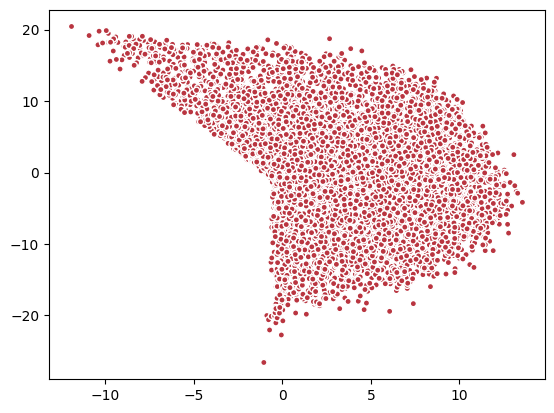

In [5]:


Model = VAE_Solver(
    
    config,

    diffusion_steps = config.diffusion_steps,
    num_var = config.num_var,
    deg = config.deg,
    latent_size = config.latent_size,
    act_type = config.act_type,
    embed_dim = config.embed_dim,
    

).to(config.device)


problem = ContextProblem(testing_num = config.evaluation_num ,variation = config.variation,num_var = config.num_var,deg = config.deg)

torch.autograd.set_detect_anomaly(True)

train(Model, config,problem,run_id = run_id)